In [1]:
# Import data from Excel sheet
import pandas as pd
df = pd.read_excel('aibl_ptdemog_final.xlsx', sheet_name='aibl_ptdemog_final')
#print(df)
sid = df['RID']
grp = df['DXCURREN']
age = df['age']
sex = df['PTGENDER(1=Male)']
tiv = df['Total'] # TIV
field = df['field_strength']
grpbin = (grp > 1) # 1=CN, ...

In [2]:
# Scan for nifti file names
import glob
dataAIBL = sorted(glob.glob('mwp1_MNI_AIBL/*.nii.gz'))
dataFiles = dataAIBL
numfiles = len(dataFiles)
print('Found ', str(numfiles), ' nifti files')

Found  606  nifti files


In [3]:
# Match covariate information
import re
debug = False
cov_idx = [-1] * numfiles # list; array: np.full((numfiles, 1), -1, dtype=int)
print('Matching covariates for loaded files ...')
for i,id in enumerate(sid):
  p = [j for j,x in enumerate(dataFiles) if re.search('_%d_MR_' % id, x)] # extract ID numbers from filename, translate to Excel row index
  if len(p)==0:
    if debug: print('Did not find %04d' % id) # did not find Excel sheet subject ID in loaded file selection
  else:
    if debug: print('Found %04d in %s: %s' % (id, p[0], dataFiles[p[0]]))
    cov_idx[p[0]] = i # store Excel index i for data file index p[0]
print('Checking for scans not found in Excel sheet: ', sum(x<0 for x in cov_idx))

labels = pd.DataFrame({'Group':grpbin}).iloc[cov_idx, :]
grps = pd.DataFrame({'Group':grp, 'RID':sid}).iloc[cov_idx, :]

Matching covariates for loaded files ...
Checking for scans not found in Excel sheet:  0


In [4]:
# Load residualized data from disk
import h5py
import numpy as np
from pandas import DataFrame
from keras.utils import to_categorical
hf = h5py.File('residuals_wb_mwp1_MNI_AIBL.hdf5', 'r')
hf.keys # read keys
labels = np.array(hf.get('labels')) # note: was of data frame type before
images = np.array(hf.get('images'))
hf.close()
labels = to_categorical(np.asarray(labels)) # use grps to access original labels
print(images.shape)

Using TensorFlow backend.


(606, 100, 100, 120, 1)


In [5]:
# specify version of tensorflow
#%tensorflow_version 1.x
#%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)
# disable tensorflow deprecation warnings
import logging
logging.getLogger('tensorflow').disabled=True
# downgrade to specific version
#!pip install tensorflow-gpu==1.15
#import tensorflow as tf
#print(tf.__version__)
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto(
    gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.8)
    # device_count = {'GPU': 1}
)
config.gpu_options.allow_growth = False #True
session = tf.Session(config=config)
set_session(session)

1.15.0


validating model newmodel/newmodel_wb_cv1.hdf5
Test accuracy: 73.10 %


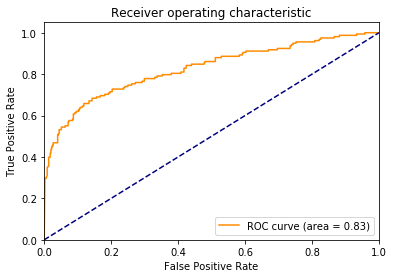

Optimal prediction threshold: 0.92098
Optimal prediction threshold: 0.99070
AUC for MCI vs. CN = 0.75
AUC for AD vs. CN = 0.94
AUC for MCI vs. CN = 0.751
AUC for AD vs. CN = 0.941
Acc for MCI vs. CN = 71.0
Acc for AD vs. CN = 74.5
confusion matrix (naive)
[[323 125]
 [ 33  63]
 [  5  57]]
oAcc for MCI vs. CN = 80.1
oAcc for AD vs. CN = 90.4
confusion matrix (optimized)
[[384  64]
 [ 44  52]
 [  8  54]]
validating model newmodel/newmodel_wb_cv2.hdf5
Test accuracy: 65.18 %


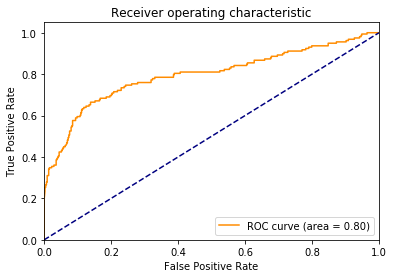

Optimal prediction threshold: 0.96653
Optimal prediction threshold: 0.98114
AUC for MCI vs. CN = 0.72
AUC for AD vs. CN = 0.91
AUC for MCI vs. CN = 0.722
AUC for AD vs. CN = 0.910
Acc for MCI vs. CN = 61.9
Acc for AD vs. CN = 63.9
confusion matrix (naive)
[[268 180]
 [ 27  69]
 [  4  58]]
oAcc for MCI vs. CN = 80.5
oAcc for AD vs. CN = 87.8
confusion matrix (optimized)
[[386  62]
 [ 44  52]
 [ 10  52]]
validating model newmodel/newmodel_wb_cv3.hdf5
Test accuracy: 72.28 %


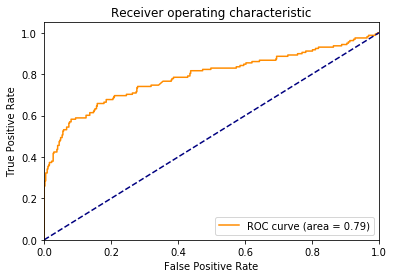

Optimal prediction threshold: 0.92061
Optimal prediction threshold: 0.99113
AUC for MCI vs. CN = 0.70
AUC for AD vs. CN = 0.92
AUC for MCI vs. CN = 0.699
AUC for AD vs. CN = 0.925
Acc for MCI vs. CN = 70.2
Acc for AD vs. CN = 73.9
confusion matrix (naive)
[[321 127]
 [ 35  61]
 [  6  56]]
oAcc for MCI vs. CN = 78.3
oAcc for AD vs. CN = 91.2
confusion matrix (optimized)
[[377  71]
 [ 47  49]
 [  9  53]]
validating model newmodel/newmodel_wb_cv4.hdf5
Test accuracy: 71.45 %


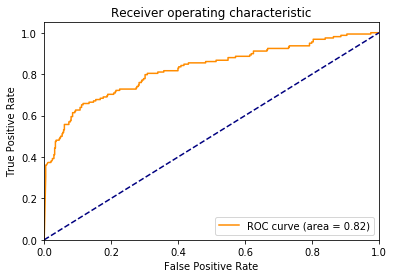

Optimal prediction threshold: 0.54305
Optimal prediction threshold: 0.98408
AUC for MCI vs. CN = 0.76
AUC for AD vs. CN = 0.93
AUC for MCI vs. CN = 0.756
AUC for AD vs. CN = 0.929
Acc for MCI vs. CN = 68.8
Acc for AD vs. CN = 71.6
confusion matrix (naive)
[[306 142]
 [ 28  68]
 [  3  59]]
oAcc for MCI vs. CN = 69.3
oAcc for AD vs. CN = 88.6
confusion matrix (optimized)
[[310 138]
 [ 29  67]
 [  3  59]]
validating model newmodel/newmodel_wb_cv5.hdf5
Test accuracy: 71.95 %


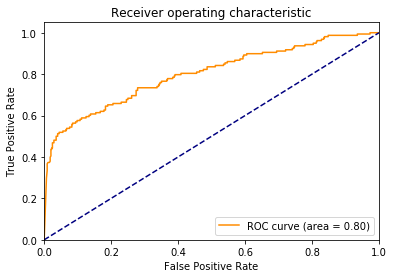

Optimal prediction threshold: 0.99985
Optimal prediction threshold: 0.99794
AUC for MCI vs. CN = 0.72
AUC for AD vs. CN = 0.93
AUC for MCI vs. CN = 0.719
AUC for AD vs. CN = 0.926
Acc for MCI vs. CN = 70.0
Acc for AD vs. CN = 74.5
confusion matrix (naive)
[[325 123]
 [ 40  56]
 [  7  55]]
oAcc for MCI vs. CN = 85.3
oAcc for AD vs. CN = 90.6
confusion matrix (optimized)
[[428  20]
 [ 60  36]
 [ 17  45]]
validating model newmodel/newmodel_wb_cv6.hdf5
Test accuracy: 66.17 %


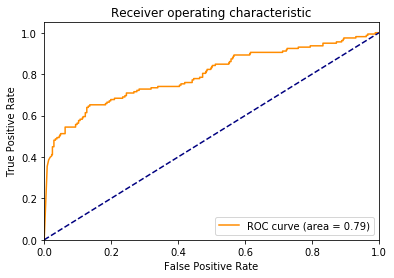

Optimal prediction threshold: 0.98652
Optimal prediction threshold: 0.99159
AUC for MCI vs. CN = 0.71
AUC for AD vs. CN = 0.92
AUC for MCI vs. CN = 0.714
AUC for AD vs. CN = 0.919
Acc for MCI vs. CN = 63.4
Acc for AD vs. CN = 66.7
confusion matrix (naive)
[[284 164]
 [ 35  61]
 [  6  56]]
oAcc for MCI vs. CN = 80.1
oAcc for AD vs. CN = 86.9
confusion matrix (optimized)
[[387  61]
 [ 47  49]
 [  9  53]]
validating model newmodel/newmodel_wb_cv7.hdf5
Test accuracy: 75.74 %


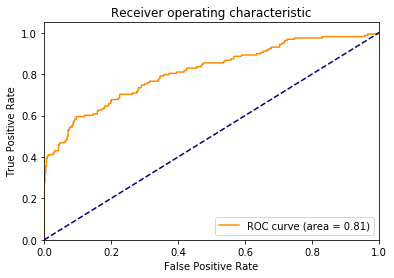

Optimal prediction threshold: 0.98332
Optimal prediction threshold: 0.99414
AUC for MCI vs. CN = 0.73
AUC for AD vs. CN = 0.93
AUC for MCI vs. CN = 0.732
AUC for AD vs. CN = 0.935
Acc for MCI vs. CN = 74.1
Acc for AD vs. CN = 80.0
confusion matrix (naive)
[[352  96]
 [ 45  51]
 [  6  56]]
oAcc for MCI vs. CN = 82.2
oAcc for AD vs. CN = 90.2
confusion matrix (optimized)
[[405  43]
 [ 54  42]
 [ 11  51]]
validating model newmodel/newmodel_wb_cv8.hdf5
Test accuracy: 73.27 %


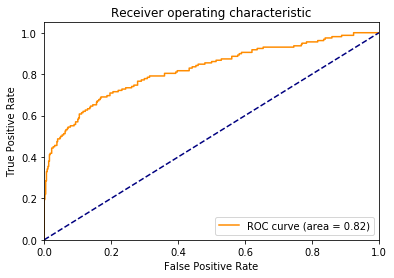

Optimal prediction threshold: 0.46763
Optimal prediction threshold: 0.87273
AUC for MCI vs. CN = 0.75
AUC for AD vs. CN = 0.92
AUC for MCI vs. CN = 0.754
AUC for AD vs. CN = 0.924
Acc for MCI vs. CN = 71.3
Acc for AD vs. CN = 74.9
confusion matrix (naive)
[[326 122]
 [ 34  62]
 [  6  56]]
oAcc for MCI vs. CN = 71.1
oAcc for AD vs. CN = 83.7
confusion matrix (optimized)
[[323 125]
 [ 32  64]
 [  6  56]]
validating model newmodel/newmodel_wb_cv9.hdf5
Test accuracy: 76.73 %


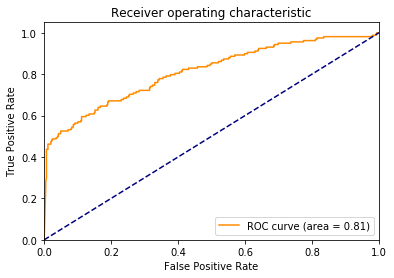

Optimal prediction threshold: 0.99714
Optimal prediction threshold: 0.71662
AUC for MCI vs. CN = 0.73
AUC for AD vs. CN = 0.94
AUC for MCI vs. CN = 0.731
AUC for AD vs. CN = 0.936
Acc for MCI vs. CN = 75.0
Acc for AD vs. CN = 81.6
confusion matrix (naive)
[[359  89]
 [ 47  49]
 [  5  57]]
oAcc for MCI vs. CN = 85.3
oAcc for AD vs. CN = 84.5
confusion matrix (optimized)
[[429  19]
 [ 61  35]
 [ 18  44]]
validating model newmodel/newmodel_wb_cv10.hdf5
Test accuracy: 66.50 %


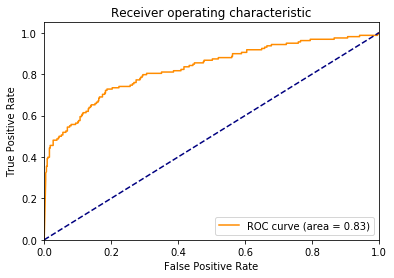

Optimal prediction threshold: 0.91695
Optimal prediction threshold: 0.94241
AUC for MCI vs. CN = 0.76
AUC for AD vs. CN = 0.93
AUC for MCI vs. CN = 0.762
AUC for AD vs. CN = 0.927
Acc for MCI vs. CN = 63.2
Acc for AD vs. CN = 65.5
confusion matrix (naive)
[[275 173]
 [ 27  69]
 [  3  59]]
oAcc for MCI vs. CN = 77.6
oAcc for AD vs. CN = 82.7
confusion matrix (optimized)
[[364  84]
 [ 38  58]
 [  6  56]]
validating model newmodel/newmodel_wb_cv11.hdf5
Test accuracy: 66.01 %


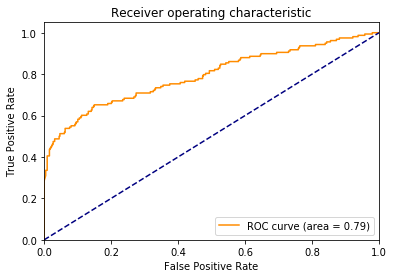

Optimal prediction threshold: 0.98454
Optimal prediction threshold: 0.99653
AUC for MCI vs. CN = 0.72
AUC for AD vs. CN = 0.91
AUC for MCI vs. CN = 0.718
AUC for AD vs. CN = 0.907
Acc for MCI vs. CN = 63.4
Acc for AD vs. CN = 66.1
confusion matrix (naive)
[[282 166]
 [ 33  63]
 [  7  55]]
oAcc for MCI vs. CN = 79.4
oAcc for AD vs. CN = 88.2
confusion matrix (optimized)
[[381  67]
 [ 45  51]
 [ 11  51]]
validating model newmodel/newmodel_wb_cv12.hdf5
Test accuracy: 71.12 %


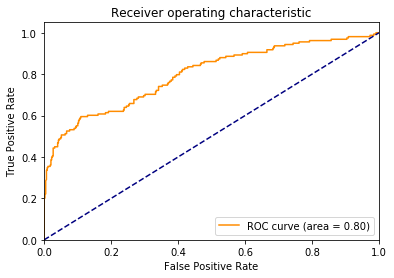

Optimal prediction threshold: 0.94769
Optimal prediction threshold: 0.95226
AUC for MCI vs. CN = 0.72
AUC for AD vs. CN = 0.92
AUC for MCI vs. CN = 0.722
AUC for AD vs. CN = 0.916
Acc for MCI vs. CN = 69.3
Acc for AD vs. CN = 73.9
confusion matrix (naive)
[[323 125]
 [ 42  54]
 [  8  54]]
oAcc for MCI vs. CN = 81.1
oAcc for AD vs. CN = 88.2
confusion matrix (optimized)
[[399  49]
 [ 54  42]
 [ 11  51]]
validating model newmodel/newmodel_wb_cv13.hdf5
Test accuracy: 80.86 %


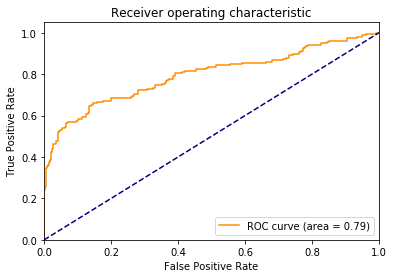

Optimal prediction threshold: 0.24143
Optimal prediction threshold: 0.86413
AUC for MCI vs. CN = 0.71
AUC for AD vs. CN = 0.93
AUC for MCI vs. CN = 0.709
AUC for AD vs. CN = 0.926
Acc for MCI vs. CN = 80.7
Acc for AD vs. CN = 87.6
confusion matrix (naive)
[[396  52]
 [ 53  43]
 [ 11  51]]
oAcc for MCI vs. CN = 79.8
oAcc for AD vs. CN = 91.2
confusion matrix (optimized)
[[385  63]
 [ 47  49]
 [  9  53]]
validating model newmodel/newmodel_wb_cv14.hdf5
Test accuracy: 76.24 %


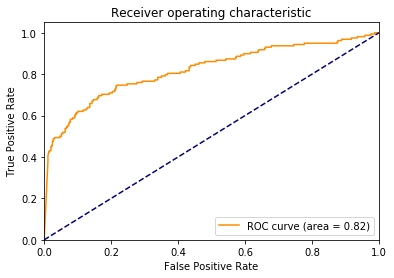

Optimal prediction threshold: 0.60597
Optimal prediction threshold: 0.99206
AUC for MCI vs. CN = 0.74
AUC for AD vs. CN = 0.94
AUC for MCI vs. CN = 0.743
AUC for AD vs. CN = 0.937
Acc for MCI vs. CN = 74.8
Acc for AD vs. CN = 78.2
confusion matrix (naive)
[[344 104]
 [ 33  63]
 [  7  55]]
oAcc for MCI vs. CN = 75.9
oAcc for AD vs. CN = 90.0
confusion matrix (optimized)
[[351  97]
 [ 34  62]
 [  7  55]]
validating model newmodel/newmodel_wb_cv15.hdf5
Test accuracy: 72.44 %


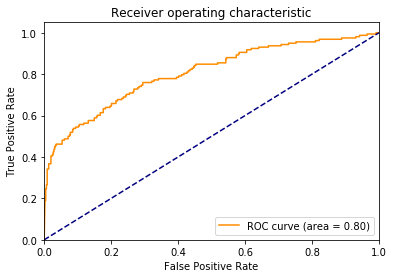

Optimal prediction threshold: 0.38585
Optimal prediction threshold: 0.39173
AUC for MCI vs. CN = 0.73
AUC for AD vs. CN = 0.92
AUC for MCI vs. CN = 0.727
AUC for AD vs. CN = 0.925
Acc for MCI vs. CN = 70.0
Acc for AD vs. CN = 74.9
confusion matrix (naive)
[[324 124]
 [ 39  57]
 [  4  58]]
oAcc for MCI vs. CN = 68.9
oAcc for AD vs. CN = 73.5
confusion matrix (optimized)
[[316 132]
 [ 37  59]
 [  2  60]]
validating model newmodel/newmodel_wb_cv16.hdf5
Test accuracy: 76.07 %


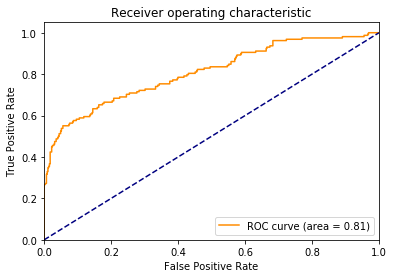

Optimal prediction threshold: 0.67685
Optimal prediction threshold: 0.97279
AUC for MCI vs. CN = 0.74
AUC for AD vs. CN = 0.92
AUC for MCI vs. CN = 0.735
AUC for AD vs. CN = 0.921
Acc for MCI vs. CN = 75.0
Acc for AD vs. CN = 79.6
confusion matrix (naive)
[[353  95]
 [ 41  55]
 [  9  53]]
oAcc for MCI vs. CN = 77.2
oAcc for AD vs. CN = 89.8
confusion matrix (optimized)
[[368  80]
 [ 44  52]
 [ 10  52]]
validating model newmodel/newmodel_wb_cv17.hdf5
Test accuracy: 67.49 %


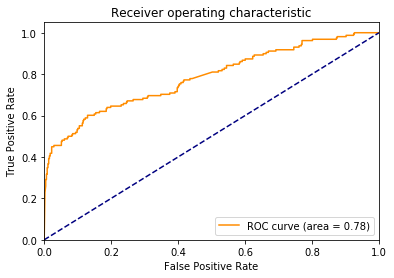

Optimal prediction threshold: 0.95024
Optimal prediction threshold: 0.94857
AUC for MCI vs. CN = 0.70
AUC for AD vs. CN = 0.92
AUC for MCI vs. CN = 0.695
AUC for AD vs. CN = 0.919
Acc for MCI vs. CN = 64.9
Acc for AD vs. CN = 69.6
confusion matrix (naive)
[[299 149]
 [ 42  54]
 [  6  56]]
oAcc for MCI vs. CN = 79.4
oAcc for AD vs. CN = 86.5
confusion matrix (optimized)
[[390  58]
 [ 54  42]
 [ 11  51]]
validating model newmodel/newmodel_wb_cv18.hdf5
Test accuracy: 75.91 %


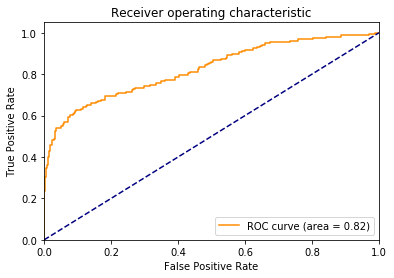

Optimal prediction threshold: 0.64966
Optimal prediction threshold: 0.97982
AUC for MCI vs. CN = 0.75
AUC for AD vs. CN = 0.94
AUC for MCI vs. CN = 0.750
AUC for AD vs. CN = 0.937
Acc for MCI vs. CN = 74.4
Acc for AD vs. CN = 79.2
confusion matrix (naive)
[[349  99]
 [ 40  56]
 [  7  55]]
oAcc for MCI vs. CN = 77.2
oAcc for AD vs. CN = 91.6
confusion matrix (optimized)
[[366  82]
 [ 42  54]
 [  7  55]]
validating model newmodel/newmodel_wb_cv19.hdf5
Test accuracy: 65.68 %


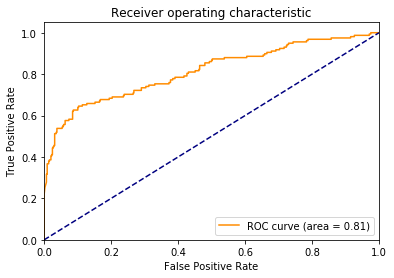

Optimal prediction threshold: 0.99241
Optimal prediction threshold: 0.99456
AUC for MCI vs. CN = 0.74
AUC for AD vs. CN = 0.93
AUC for MCI vs. CN = 0.736
AUC for AD vs. CN = 0.933
Acc for MCI vs. CN = 62.7
Acc for AD vs. CN = 65.3
confusion matrix (naive)
[[276 172]
 [ 31  65]
 [  5  57]]
oAcc for MCI vs. CN = 82.9
oAcc for AD vs. CN = 90.4
confusion matrix (optimized)
[[402  46]
 [ 47  49]
 [ 10  52]]
validating model newmodel/newmodel_wb_cv20.hdf5
Test accuracy: 71.29 %


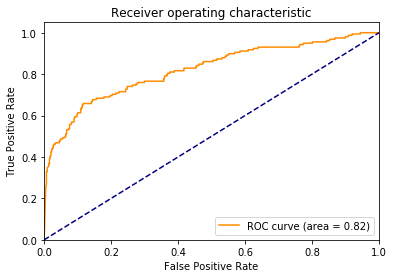

Optimal prediction threshold: 0.97464
Optimal prediction threshold: 0.98977
AUC for MCI vs. CN = 0.75
AUC for AD vs. CN = 0.93
AUC for MCI vs. CN = 0.749
AUC for AD vs. CN = 0.931
Acc for MCI vs. CN = 68.8
Acc for AD vs. CN = 72.4
confusion matrix (naive)
[[311 137]
 [ 33  63]
 [  4  58]]
oAcc for MCI vs. CN = 79.6
oAcc for AD vs. CN = 88.6
confusion matrix (optimized)
[[383  65]
 [ 46  50]
 [  6  56]]


In [6]:
# Split data into training/validation and holdout test data
from sklearn.model_selection import StratifiedKFold,train_test_split
import numpy as np
import gc
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot as plt
%matplotlib inline
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0" # model will be trained on GPU 0

import keras
from keras import layers
from keras.layers.normalization import BatchNormalization
from keras import models
from keras.optimizers import Adam
from keras import initializers
from keras.callbacks import EarlyStopping
import tensorflow as tf
from statistics import mean,stdev
from sklearn.metrics import confusion_matrix

acc_test, auc_test, auc_AD, auc_MCI = [], [], [], []
acc_AD, acc_MCI, opt_acc_AD, opt_acc_MCI = [], [], [], []

num_kfold = 20 # number of cross-validation loops equal to number of models
batch_size = 8

for k in range(num_kfold):
    gc.collect()
    print('validating model newmodel/newmodel_wb_cv%d.hdf5' % (k+1))
    mymodel = models.load_model('newmodel/newmodel_wb_cv%d.hdf5' % (k+1))
    
    # Calculate accuracy for validation data
    #scores = mymodel.evaluate(images, labels, batch_size=batch_size) #, verbose=0
    #print("Test %s: %.2f%%" % (mymodel.metrics_names[1], scores[1]*100))
    #acc_test.append(scores[1]*100)
    
    # calculate area under the curve
    # AUC as optimization function during training: https://stackoverflow.com/questions/41032551/how-to-compute-receiving-operating-characteristic-roc-and-auc-in-keras
    pred = mymodel.predict(images, batch_size=batch_size)
    acc_all = np.mean((labels[:, 1] == np.round(pred[:, 1])).astype(int))*100
    print("Test accuracy: %.2f %%" % acc_all)
    acc_test.append(acc_all)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    acc = dict()
    opt_acc = dict()
    thresh = dict()
    for i in range(2): # classes dummy vector: 0 - CN, 1 - MCI/AD
        fpr[i], tpr[i], _ = roc_curve(labels[:, i], pred[:,i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    #Plot of a ROC curve for a specific class
    plt.figure()
    plt.plot(fpr[1], tpr[1], color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc[1])
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    auc_test.append(roc_auc[1])
    
    # redo AUC for binary comparison: AD vs. HC and MCI vs. HC
    for i in [2,3]:
      grpi = np.equal(grps.Group.to_numpy(dtype=np.int), np.ones((grps.shape[0],), dtype=np.int)*i)
      grp1 = np.equal(grps.Group.to_numpy(dtype=np.int), np.ones((grps.shape[0],), dtype=np.int))
      grpidx = np.logical_or(grpi, grp1)
      fpr[i], tpr[i], thresholds = roc_curve(labels[grpidx, 1], pred[grpidx, 1])
      roc_auc[i] = auc(fpr[i], tpr[i])
      thresh[i] = thresholds[np.argmax(tpr[i] - fpr[i])]
      print('Optimal prediction threshold: %0.5f' % thresh[i])
      acc[i] = np.mean((labels[grpidx, 1] == np.round(pred[grpidx, 1])).astype(int))*100
      opt_acc[i] = np.mean((labels[grpidx, 1] == (pred[grpidx, 1]>thresh[i]).astype(int)).astype(int))*100

    print('AUC for MCI vs. CN = %0.2f' % roc_auc[2])
    print('AUC for AD vs. CN = %0.2f' % roc_auc[3])
    auc_AD.append(roc_auc[3])
    auc_MCI.append(roc_auc[2])
    acc_AD.append(acc[3])
    acc_MCI.append(acc[2])
    opt_acc_AD.append(opt_acc[3])
    opt_acc_MCI.append(opt_acc[2])
    
    print('AUC for MCI vs. CN = %0.3f' % roc_auc[2])
    print('AUC for AD vs. CN = %0.3f' % roc_auc[3])
    print('Acc for MCI vs. CN = %0.1f' % acc[2])
    print('Acc for AD vs. CN = %0.1f' % acc[3])
    print('confusion matrix (naive)')
    confmat = confusion_matrix(grps.Group-1, np.round(pred[:, 1]))
    print(confmat[:,(0,1)])
    print('oAcc for MCI vs. CN = %0.1f' % opt_acc[2])
    print('oAcc for AD vs. CN = %0.1f' % opt_acc[3])
    print('confusion matrix (optimized)')
    confmat = confusion_matrix(grps.Group-1, (pred[:, 1]>thresh[2]).astype(int)) ## use MCI threshold
    print(confmat[:,(0,1)])

In [7]:
# print model performance summary
from statistics import mean,stdev
print('Acc for all test data = %0.1f +/- %0.1f' % (mean(acc_test), stdev(acc_test)))
print('AUC for all test data = %0.3f +/- %0.3f' % (mean(auc_test), stdev(auc_test)))
print('AUC for MCI vs. CN = %0.3f +/- %0.3f' % (mean(auc_MCI), stdev(auc_MCI)))
print('AUC for AD vs. CN = %0.3f +/- %0.3f' % (mean(auc_AD), stdev(auc_AD)))
print('Mean Acc for MCI vs. CN = %0.1f +/- %0.1f' % (mean(acc_MCI), stdev(acc_MCI)))
print('Mean Acc for AD vs. CN = %0.1f +/- %0.1f' % (mean(acc_AD), stdev(acc_AD)))
print('Mean oAcc for MCI vs. CN = %0.1f +/- %0.1f' % (mean(opt_acc_MCI), stdev(opt_acc_MCI)))
print('Mean oAcc for AD vs. CN = %0.1f +/- %0.1f' % (mean(opt_acc_AD), stdev(opt_acc_AD)))

Acc for all test data = 71.8 +/- 4.4
AUC for all test data = 0.808 +/- 0.014
AUC for MCI vs. CN = 0.731 +/- 0.019
AUC for AD vs. CN = 0.926 +/- 0.009
Mean Acc for MCI vs. CN = 69.7 +/- 5.2
Mean Acc for AD vs. CN = 73.7 +/- 6.3
Mean oAcc for MCI vs. CN = 78.6 +/- 4.5
Mean oAcc for AD vs. CN = 87.7 +/- 4.2


In [8]:
results = pd.DataFrame({'Accuracy_Test':acc_test, 'AUC_Test':auc_test, 'AUC_MCI':auc_MCI, 'AUC_AD':auc_AD,
                        'Acc_MCI':acc_MCI, 'Acc_AD':acc_AD,
                        'Opt_acc_MCI':opt_acc_MCI, 'Opt_acc_AD':opt_acc_AD})
print(results)

    Accuracy_Test  AUC_Test   AUC_MCI    AUC_AD    Acc_MCI     Acc_AD  \
0       73.102310  0.825780  0.751290  0.941118  70.955882  74.509804   
1       65.181518  0.795526  0.721738  0.909778  61.948529  63.921569   
2       72.277228  0.787523  0.698963  0.924647  70.220588  73.921569   
3       71.452145  0.823654  0.755557  0.929093  68.750000  71.568627   
4       71.947195  0.799927  0.718715  0.925673  70.036765  74.509804   
5       66.171617  0.794756  0.714309  0.919319  63.419118  66.666667   
6       75.742574  0.811561  0.732038  0.934692  74.080882  80.000000   
7       73.267327  0.820355  0.753569  0.923765  71.323529  74.901961   
8       76.732673  0.811448  0.730748  0.936402  75.000000  81.568627   
9       66.501650  0.826620  0.761719  0.927113  63.235294  65.490196   
10      66.006601  0.792538  0.718471  0.907222  63.419118  66.078431   
11      71.122112  0.798019  0.721947  0.915809  69.301471  73.921569   
12      80.858086  0.794092  0.708822  0.926123  80